<font color="red" size="6"> Enunciado</font>

**1. Realizar un análisis exploratorio de los datos.**<br>
**2. Aplicar tres de los algoritmos desarrollados en clases justificando su elección.**<br>
**3. Aplicar evaluación de cada uno de ellos con medidas vistas en clases y cross validation.**<br>
**4. Seleccionar el mejor método para el problema presentado.**<br>

<font color="red">Variables independientes utilizar:</font>

• Sexo **[sexo]**: Variable Categorica, 2 posibles valores.<br>
• Edad **[edad]**: Variable Continua.<br>
• Estado civil **[ecivil]**: Variable Categorica, 8 posibles valores.<br>
• Escolaridad **[esc]**: Variable Categorica, 20 posibles valores, Calculado apartir de la Edad ,e6a y e6b.<br>
• Nivel educacional **[educ]**: Variable Categorica, 14 posibles valores. esta variable fue calculada apartir de e6a(¿Cuál fue el nivel educacional más alto alcanzado o el nivel educacional actual?).<br>
• Dependencia administrativa **[depen]**: Variable Categorica, 12 posibles valores, calculada apartir de e9depen (Dependencia del establecimiento (mineduc)). <br> 
• Condición de actividad **[activ]**: Variable Categorica, 3 posibles valores. Calculado apartir de la edad y de o1, o2, o3 y o6<br>
• Indicador de materialidad **[indmat]** Variable Categorica: 4 posibles valores, calculados apartir de v2,v4 y v6.<br>
• Indicador de Saneamiento **[indsan]**: Variable Categorica, 3 posibles valores. calulada apartir de v22 y v23.<br>
• Calidad global de la vivienda **[calglobviv]**: Variable Categorica, 3 posibles valores, calculada a partir de tipovivienda, indmat, indaccbas, v2, v4, v6.<br>
• Hacinamiento **[hacinamiento]**: Variable Categorica, 5 posibles valores, Calculada apartir de v27a, v28, v30a, numper.<br>
• Sistema de salud previsional **[s12]** Variable Categorica<br>
• Tipo de contrato **[o16]** Variable Categorica, 3 posibles valores.<br>
• Empleado **[o1]** Variable Categorica, 2 posible valores, (La semana pasada, ¿trabajó al menos una hora, sin considerar los quehaceres del hogar?)<br>
• Ocupación u Oficio **[oficio1]** Variable Categorica, 11 posibles valores.<br>
• Ingreso Total **[ytot]** Variable Continua.<br>


<font color="red">Variable dependiente:</font>

- Pobreza: Variable Categorica, 3 posibles valores.


<font color="red">Variables no incluidas en el dataset pero que fueron la base para calcular algunas de las variables explicativas que si estan dentro del dataset.</font>:

- v2: Categorica, ¿Cuál es el material que predomina en los muros exteriores de la vivienda?<br>
- v4: Categorica, ¿Cuál es el material que predomina en el piso de la vivienda?<br>
- v6: Categorica, ¿Cuál es el material que predomina en el techo de la vivienda?<br>
- o2: Categorica, ¿Aunque no trabajó la semana pasada, ¿realizó alguna actividad por lo menos durante una hora?<br>
- o3: Categorica, ¿Aunque no trabajó la semana pasada, ¿tenía algún empleo, negocio u otra actividad del cual estuvo ausente temporalmente por licencia, permiso postnatal parental, huelga, enfermedad, vacaciones, suspensión temporal u otra razon?<br>
- o6: Categorica, ¿Buscó trabajo remunerado o realizó alguna gestión para iniciar una actividad?
- v22: Categorica, ¿Cuál es el sistema de distribución del agua en la vivienda?<br>
- v23; Categorica, La vivienda donde Ud. vive, ¿dispone de sistema de eliminación de excretas?
- v27a, Continua, ¿Cuántas piezas de cada tipo tiene la vivienda? Dormitorios
- v28:  ¿Cuántos hogares hay en esta vivienda?
- v30a: ¿Cuántas piezas de cada tipo ocupa su hogar en esta vivienda? Dormitorios
- numper: Número de personas en el hogar (excluye SDPA)
- e6a: Categorica, ¿Cuál fue el nivel educacional más alto alcanzado o el nivel educacional actual?
- e6b: Continua: En ese nivel educacional, ¿cuál fue el último curso que aprobó (para los que no están estudiando) o que cursa actualmente (para los que están estudiando)?
- e9depen: Dependencia del establecimiento (mineduc)

<font color="red"> Apriori leyendo toda la informacion recopilada, me preocupa una posible correlacion entre las variables explicativas indmat y calglobviv ya que ambas fueron calculadas apartir de v2, v4 y v6, considerando que calglobviv fue calculada tambien apartir de indmat. </font>

<font color="red">tambien me preocupa una posible correlacion entre o1 y activ, ya que activ fue calculada apartir de o1 y otras variables.</font>

<font color="red">Finalmente me preocupan las variables educ y esc, ya que ambas fueron calculadas apartir de la variable e6a, creo que teorica y conceptualmente ambas estan correlacionas</Font>


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.ticker as ticker
import random

In [5]:
df = pd.read_csv("CASEN_2017_select.csv", encoding="latin1")

In [6]:
df.head()

folio    sexo  edad  \
0  110110020201   Mujer    56   
1  110110020301   Mujer    21   
2  110110020401  Hombre    24   
3  110110020401  Hombre    28   
4  110110020501  Hombre    26   

                                            ecivil  o1  \
0                                       Soltero(a)  Sí   
1                                       Soltero(a)  Sí   
2  Conviviente o pareja sin acuerdo de unión civil  Sí   
3  Conviviente o pareja sin acuerdo de unión civil  Sí   
4                                        Casado(a)  No   

                                             oficio1               o16  \
0                         Trabajadores no calificado               NaN   
1                         Trabajadores no calificado        Plazo fijo   
2  Trabajadores de los servicios y vendedores de ...        Plazo fijo   
3  Trabajadores de los servicios y vendedores de ...        Plazo fijo   
4                         Trabajadores no calificado  Plazo indefinido   

                              s12      ytot    pobreza   esc  \
0                         No sabe  250000.0  No pobres  12.0   
1            Ninguno (Particular)  211091.0  No pobres   7.0   
2                         No sabe  281750.0  No pobres  12.0   
3                         No sabe  311750.0  No pobres  12.0   
4  Sistema Público FONASA Grupo B  341667.0  No pobres  15.0   

                              educ depen     activ              indmat  \
0                 M. Hum. Completa   NaN  Ocupados  Vivienda Aceptable   
1                    Básica Incom.   NaN  Ocupados  Vivienda Aceptable   
2                 M. Hum. Completa   NaN  Ocupados  Vivienda Aceptable   
3                 M. Hum. Completa   NaN  Ocupados  Vivienda Aceptable   
4  Técnico Nivel Superior Completo   NaN  Ocupados  Vivienda Aceptable   

        indsan   calglobviv                     hacinamiento  
0  Deficitario  Recuperable  Sin hacinamiento (2,49 y menos)  
1    Aceptable    Aceptable  Sin hacinamiento (2,49 y menos)  
2    Aceptable    Aceptable  Sin hacinamiento (2,49 y menos)  
3    Aceptable    Aceptable  Sin hacinamiento (2,49 y menos)  
4  Deficitario  Recuperable  Sin hacinamiento (2,49 y menos)

# Limpieza, preprocesamiento y un poquito de EDA cuando es necesario.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216439 entries, 0 to 216438
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   folio         216439 non-null  int64  
 1   sexo          216439 non-null  object 
 2   edad          216439 non-null  int64  
 3   ecivil        216439 non-null  object 
 4   o1            175076 non-null  object 
 5   oficio1       92417 non-null   object 
 6   o16           68630 non-null   object 
 7   s12           216439 non-null  object 
 8   ytot          144706 non-null  float64
 9   pobreza       216231 non-null  object 
 10  esc           174058 non-null  float64
 11  educ          216439 non-null  object 
 12  depen         58122 non-null   object 
 13  activ         175076 non-null  object 
 14  indmat        216439 non-null  object 
 15  indsan        216439 non-null  object 
 16  calglobviv    216439 non-null  object 
 17  hacinamiento  216439 non-null  object 
dtypes: f

In [8]:
# Antes de iniciar el proceso de limpieza, debo tener en cuenta la cantidad de clases dentro de mi variable dependiente
# Deseo tener especial cuidado en no eliminar muchas filas de mis clases sub-representadas (pobres extremos y no extremos)
val_count_pobreza_original = df["pobreza"].value_counts()
val_count_pobreza_original

No pobres             195357
Pobres no extremos     15260
Pobres extremos         5614
Name: pobreza, dtype: int64

Partire elimando duplicados y despues el folio ya que no es relevante una vez identificado los duplicados.

In [9]:
df = df.drop_duplicates()

In [10]:
df = df.drop("folio", axis=1)

Vere los valores faltantes para cada variable

In [11]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
depen         158227  0.732349
o16           147438  0.682413
oficio1       123655  0.572334
ytot           71465  0.330774
esc            42099  0.194854
o1             41081  0.190142
activ          41081  0.190142
pobreza          208  0.000963
calglobviv         0  0.000000
indsan             0  0.000000
indmat             0  0.000000
sexo               0  0.000000
educ               0  0.000000
edad               0  0.000000
s12                0  0.000000
ecivil             0  0.000000
hacinamiento       0  0.000000

Como criterio inicial, eliminare las variables que tengan mas de 50% de faltantes, seria muy atrevido tratar de llenarlas haciendo feature engineering con tanto porcentaje faltante.

In [12]:
df = df.drop(["depen","o16","oficio1"],axis=1)

Eliminare tambien las filas faltantes de mi variable dependiente "pobreza", son muy poquitas porcentualmente, es mejor eliminarlas.

In [13]:
df = df.drop(df.loc[df['pobreza'].isnull()].index)

Vuelvo a visualizar datos faltantes

In [14]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
ytot          71453  0.331037
esc           42082  0.194963
o1            41077  0.190307
activ         41077  0.190307
sexo              0  0.000000
edad              0  0.000000
ecivil            0  0.000000
s12               0  0.000000
pobreza           0  0.000000
educ              0  0.000000
indmat            0  0.000000
indsan            0  0.000000
calglobviv        0  0.000000
hacinamiento      0  0.000000

Mirando el libro de codigo, recuerdo que varias variables tenian como posible categoria un "No sabe" o "No responde", eliminare filas que tengan esto como respuesta en alguna variable siempre y cuando no representen una parte significativa de la data (>10%.)

In [15]:
categorical_cols = df.select_dtypes(include="object").columns

In [16]:
for n in categorical_cols:
    print(f"{df[n].value_counts()}\n\n")

Mujer     112724
Hombre    103122
Name: sexo, dtype: int64


Soltero(a)                                         105589
Casado(a)                                           59590
Conviviente o pareja sin acuerdo de unión civil     27560
Viudo(a)                                            10615
Separado(a)                                          8860
Divorciado (a)                                       3044
Conviviente civil (con acuerdo de unión civil)        366
Anulado(a)                                            222
Name: ecivil, dtype: int64


Sí    89142
No    85627
Name: o1, dtype: int64


Sistema Público FONASA Grupo B          63489
Sistema Público FONASA Grupo A          52444
ISAPRE                                  25608
Sistema Público FONASA Grupo C          24412
Sistema Público FONASA Grupo D          21404
Sistema Público FONASA No sabe grupo    10922
Ninguno (Particular)                     5870
No sabe                                  5176
FF.AA. y de Orden            

Aqui eliminare 3 categorias para s12 (Ninguno (Particular), No sabe, Otro sistema), la suma de las 3 de igual forma representa menos de 10% de la data. Tambien podria haber juntado estas 3 en una sola descripcion pero decido elimarlas mejor ya que es poca data porcentualmente

In [17]:
f"{np.round(np.sum([588,5197,1641])/ df.s12.count() * 100,2)}%"

'3.44%'

In [18]:
df = df.drop(df.loc[(df['s12']=="No sabe") | (df['s12']=="Otro sistema") | (df['s12']=="Ninguno (Particular)")].index)

In [19]:
# Aqui eliminare NS/NR para educ
df = df.drop(df.loc[(df['educ']=="NS/NR")].index)

In [20]:
# Aqui eliminare NS/NR para hacinamiento
df = df.drop(df.loc[(df['hacinamiento']=="NS/NR")].index)

In [21]:
# Eliminare Sin dato para calglobviv
df = df.drop(df.loc[(df['calglobviv']=="Sin dato")].index)

Vuelvo a visualizar valores Faltantes

In [22]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
ytot          65527  0.325621
o1            38802  0.192817
esc           38802  0.192817
activ         38802  0.192817
sexo              0  0.000000
edad              0  0.000000
ecivil            0  0.000000
s12               0  0.000000
pobreza           0  0.000000
educ              0  0.000000
indmat            0  0.000000
indsan            0  0.000000
calglobviv        0  0.000000
hacinamiento      0  0.000000

Ahora lidiare con los valores faltantes de la variable ytot, aqui se observa que la mayoria de los valores faltantes se concentran en gente muy joven y inactiva laboralmente, es normal que no tengan ingresos debido a su edad. (aunque hay excepciones de gente mayor que no constesto logicamente)

In [23]:
df[(df["ytot"].isnull())]["activ"].value_counts()

Inactivos      29386
Ocupados        4436
Desocupados     3750
Name: activ, dtype: int64

In [24]:
#Se observa que gente que no constesto es en la gran mayoria muy joven en comparacion a la que si contesto la pregunta sobre ingresos.
df[df["ytot"].isnull()]["edad"].describe() , df[~df["ytot"].isnull()]["edad"].describe()

(count    65527.000000
 mean        22.516566
 std         18.874013
 min          0.000000
 25%          8.000000
 50%         17.000000
 75%         31.000000
 max        103.000000
 Name: edad, dtype: float64,
 count    135710.000000
 mean         45.399425
 std          21.167632
 min           0.000000
 25%          29.000000
 50%          46.000000
 75%          62.000000
 max         110.000000
 Name: edad, dtype: float64)

In [25]:
# Logicamente la mayoria al ser muy joven, tiene poca educacion.
df[df["ytot"].isnull()]["educ"].value_counts()

Básica Incom.                        16751
Sin Educ. Formal                     12364
M. Hum. Completa                      8569
M. Hum. Incompleta                    7661
Profesional Incompleto                6024
Básica Compl.                         4441
M. Téc Completa                       2408
Profesional Completo                  2279
Técnico Nivel Superior Incompleta     1890
Técnico Nivel Superior Completo       1635
M. Téc. Prof. Incompleta              1338
Postgrado Completo                     113
Postgrado Incompleto                    54
Name: educ, dtype: int64

In [26]:
df[df["ytot"].isnull()]["pobreza"].value_counts()

No pobres             57621
Pobres no extremos     5512
Pobres extremos        2394
Name: pobreza, dtype: int64

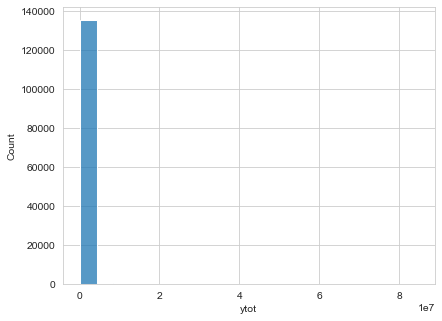

In [27]:
# Se visualiza que el histograma aparece muy distorsionado, esto es debido a los ingresos atipicos muy altos de algunas personas.
sns.histplot(df["ytot"],bins=20);

Sorprendentemente ninguna persona que tenga ingresos sobre los 700.000 se considera pobre, si bien podria interesarme analizar hogares con alto nivel de ingresos, mi objetivo final es predecir correctamente la variable dependiente pobreza y los outliers son perjudiciales para algunos algoritmos, por lo que he tomado la decision arbitraria de eliminar todas las filas que tengan mas de 2.000.000 en ingresos totales (2983 filas)

In [28]:
print(df[df["ytot"]>700000]["pobreza"].value_counts())
print("\n")
print(df[df["ytot"]>2000000]["pobreza"].value_counts())

df = df.drop(df.loc[(df["ytot"]>2000000)].index)

No pobres    17706
Name: pobreza, dtype: int64


No pobres    2983
Name: pobreza, dtype: int64


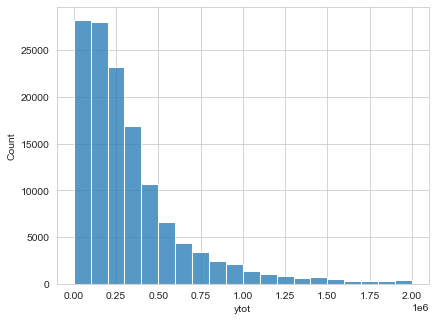

In [29]:
sns.histplot(df["ytot"], bins=20);

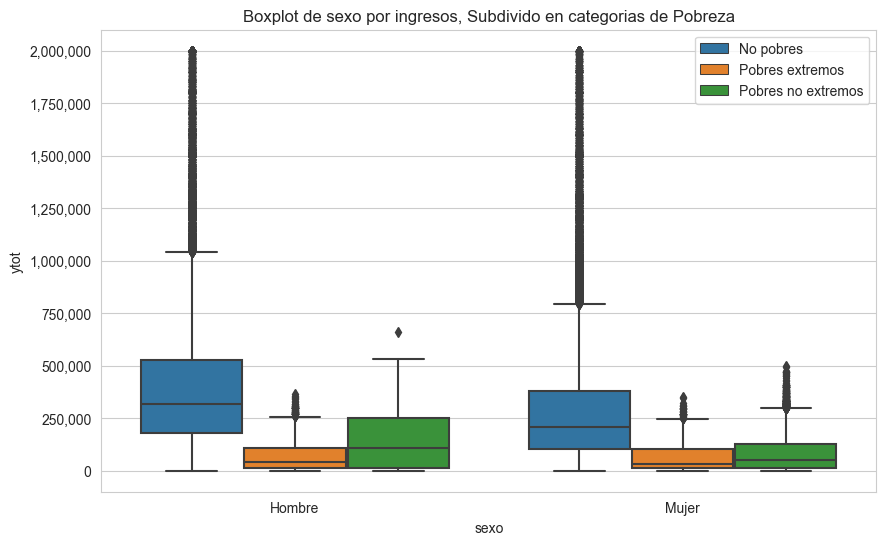

In [30]:
plt.figure(figsize=(10,6),dpi=100)
ax = sns.boxplot(x=df["sexo"], y=df["ytot"], hue=df["pobreza"],)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Boxplot de sexo por ingresos, Subdivido en categorias de Pobreza")
plt.legend(bbox_to_anchor=([1,1,0,0]));

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

He decido rellenar los valores faltantes de la variable ytot (ingresos totales) con las medianas de los grupos donde simultaneamente se tienen el mismo sistema de salud previsional (s12), el mismo nivel de educacion, el mismo grupo etario y misma categoria de pobreza.

In [31]:
# Primero discretizare mi variable de "Edad", para esto creare una funcion.
# La discretizare en base a lo siguiente. infancia y niñez (0-14 años),  
# adolescencia y juventud (15 - 26 años), adultez (27 - 59 años) y vejez (60 años y más)

def discretizar_edad(edad):
    if edad < 15:
        return "infancia y niñez (0-14 años)"
    elif edad >=15 and edad <27:
        return "adolescencia y juventud (15-26 años)"
    elif edad >=27 and edad <60:
        return "adultez (27-59 años)"
    else:
        return "vejez (60 años y más)"
    

In [32]:
df["edad_discretizada"] = df["edad"].apply(discretizar_edad)

In [33]:
warnings.filterwarnings("ignore")
df["ytot_modificada"] = df.groupby(["s12","educ","edad_discretizada","pobreza"])["ytot"].transform(lambda value: value.fillna(value.median()))
warnings.filterwarnings("default")

Se observa que los estadisticos descriptivos de ytot decrecen al rellenar los valores con el criterio seleccionado en comparacion a la variable original con datos faltantes, lo que es el comportamiento esperado ya que como analisamos, los valores faltantes de esta variable pertenecian a gente muy joven y con poco desarrollo educacional y/o laboral.

In [34]:
df[["ytot","ytot_modificada"]].describe()

ytot  ytot_modificada
count  1.327270e+05     1.980940e+05
mean   3.319816e+05     2.729918e+05
std    3.328006e+05     3.058908e+05
min    8.300000e+01     8.300000e+01
25%    1.046460e+05     3.315700e+04
50%    2.683330e+05     2.000000e+05
75%    4.287475e+05     3.634695e+05
max    2.000000e+06     2.000000e+06

Satisfecho con el resultado, remplazare la variable ytot original por mi ytot_modificada.

In [35]:
df["ytot"] = df["ytot_modificada"]
df = df.drop("ytot_modificada",axis=1)

In [36]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
o1                 38802  0.195719
esc                38802  0.195719
activ              38802  0.195719
ytot                 160  0.000807
sexo                   0  0.000000
edad                   0  0.000000
ecivil                 0  0.000000
s12                    0  0.000000
pobreza                0  0.000000
educ                   0  0.000000
indmat                 0  0.000000
indsan                 0  0.000000
calglobviv             0  0.000000
hacinamiento           0  0.000000
edad_discretizada      0  0.000000

In [37]:
# Eliminare esos 161 valores faltantes que no fueron llenados por mi funcion de relleno de valores faltantes para ytot.
df = df.drop(df.loc[(df['ytot'].isnull())].index)

Ahora trabajare con las variables activ y o1, sospecho que ambas estan correlacionadas ya que activ fue calculada usando o1 y otras variables no incluidas en el dataset, tambien se observa que tienen la misma cantidad de datos faltantes.

Analizando los valores faltantes de activ, me doy cuenta que todos los valores faltantes son para gente menor de 15 años. lo cual tiene sentido, ya que este grupo etario no es activo laboralmente.

In [38]:
df[df["activ"].isnull()]["edad"].describe()

count    38746.000000
mean         7.187632
std          4.226428
min          0.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         14.000000
Name: edad, dtype: float64

Aqui quiero confirmar la supuesta correlacion entre las variables categoricas o1 y activ, convertire ambas variables a dummies y analizare sus correlaciones mediante un heatmap.

Se observan correlaciones muy elevadas (cercanas a 1 o -1) entre algunas variables dummies de las 2 variables, por lo que es una señal de que ambas variables estarian explicando lo mismo, me quedare con activ, ya que es una variable mas compleja construida apartir de a o1 y otras variables no incluidas en el dataset facilitado por la profesora.

In [39]:
y = pd.get_dummies(df[["o1","activ"]])

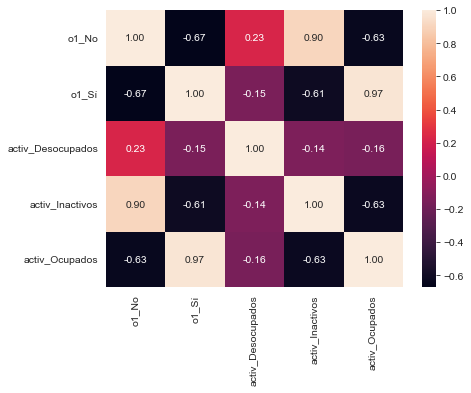

In [40]:
sns.heatmap(y.corr(), annot=True, fmt='.2f');

Eliminare o1 del dataset

In [41]:
df = df.drop("o1",axis=1)

Llenare los datos faltantes de activ con una nueva categoria llamada "Menor de 15 (No aplica)"

In [42]:
df["activ"] = df["activ"].fillna("Menor de 15 (No aplica)")

Tambien me preocupa la posible correlacion entre calglobviv y indmat.

In [43]:
z = pd.get_dummies(df[["indmat","calglobviv"]])

Se observa que existe una correlacion significativa (alrededor del 0.60) entre TODAS las variables dummy de indmat con alguna de calglobviv.

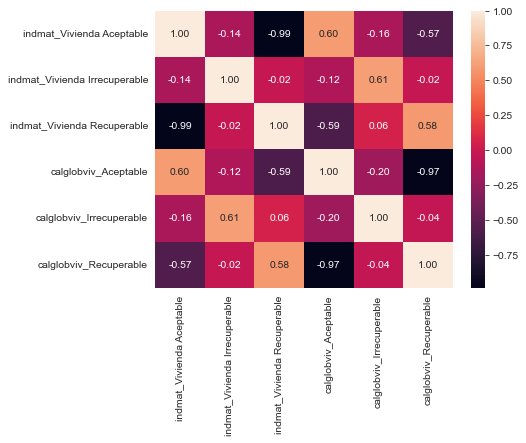

In [44]:
sns.heatmap(z.corr(), annot=True, fmt='.2f');

Me quedare solo con Calglobviv ya que entiendo que es una medida mas general de la calidad de la vivienda y esta variable fue calculada incluyendo a indmat como uno de sus criterios. Eliminare a indmat del dataset.

In [45]:
df = df.drop("indmat",axis=1)

In [46]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
esc                38746  0.195594
sexo                   0  0.000000
edad                   0  0.000000
ecivil                 0  0.000000
s12                    0  0.000000
ytot                   0  0.000000
pobreza                0  0.000000
educ                   0  0.000000
activ                  0  0.000000
indsan                 0  0.000000
calglobviv             0  0.000000
hacinamiento           0  0.000000
edad_discretizada      0  0.000000

Finalmente eliminare la variable esc (escolaridad), ya que teoricamente esta correlacionada con educ (nivel de educacion) y ambas fueron calculadas apartir de e6a, aparte esc tiene valores faltante y educ no.

In [47]:
df[df.esc.isnull()]["pobreza"].value_counts()
#Porcentualmente, Gran parte de los valores nulos de esc son de las clases poco representadas de pobreza (pobres no extremos y extremos)
#Una mejor decision es usar educ.

No pobres             32784
Pobres no extremos     4346
Pobres extremos        1616
Name: pobreza, dtype: int64

In [48]:
df[~df.esc.isnull()]["pobreza"].value_counts()

No pobres             146078
Pobres no extremos      9848
Pobres extremos         3422
Name: pobreza, dtype: int64

In [49]:
df = df.drop("esc",axis=1)

Finalmente ya no tengo valores faltantes en mi dataset, la variable edad_discretizada la conservare para propositos del EDA, pero quizas la elimine antes de correr un modelo (o quizas no).

In [50]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
sexo                   0      0.0
edad                   0      0.0
ecivil                 0      0.0
s12                    0      0.0
ytot                   0      0.0
pobreza                0      0.0
educ                   0      0.0
activ                  0      0.0
indsan                 0      0.0
calglobviv             0      0.0
hacinamiento           0      0.0
edad_discretizada      0      0.0

In [51]:
#Excelente!, observamos que durante la limpieza no se perdio mucha informacion de las clases sub-representadas. (menos del 10%)
print(val_count_pobreza_original)
print("\n")
print(df["pobreza"].value_counts())

No pobres             195357
Pobres no extremos     15260
Pobres extremos         5614
Name: pobreza, dtype: int64


No pobres             178862
Pobres no extremos     14194
Pobres extremos         5038
Name: pobreza, dtype: int64


# EDA

Pie plot de las clases dentro de mi variable dependiente

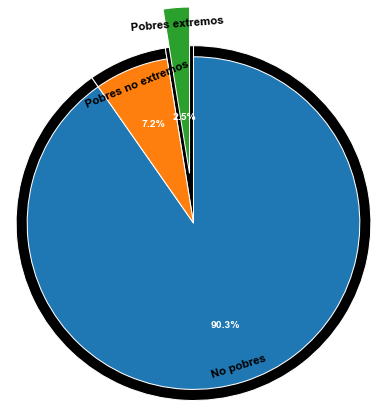

In [52]:
x = df.pobreza.value_counts()

fig, ax = plt.subplots()
ax.axis('equal')
pie = ax.pie(x.values, startangle=90, explode=(0, 0, 0), rotatelabels=False, radius=1.6, autopct='%.1f%%',
            colors=["k"],counterclock=False ); # Black circle

_, _, autopcts = pie

pie2 = ax.pie(x.values, radius=1.5,  labeldistance=0.9, labels=x.index,
              rotatelabels =True, startangle=90,counterclock=False, explode=(0,0,0.45),textprops={'fontsize': 10})

_, labels = pie2

plt.setp(pie2[1], rotation_mode="anchor", ha="center",va="center")#ha="center"
for n in pie2[1]:
    rot = n.get_rotation()
    n.set_rotation(rot+90+(1-rot//180)*180)
    
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':10});
plt.setp(labels, **{'color':'black', 'weight':'bold', 'fontsize':11});

Histogramas de variables Continuas, se observa que la mayoria de la pobreza extrema y no extrema, es mas frecuente en personas de poca edad o/y de bajos ingresos totales.

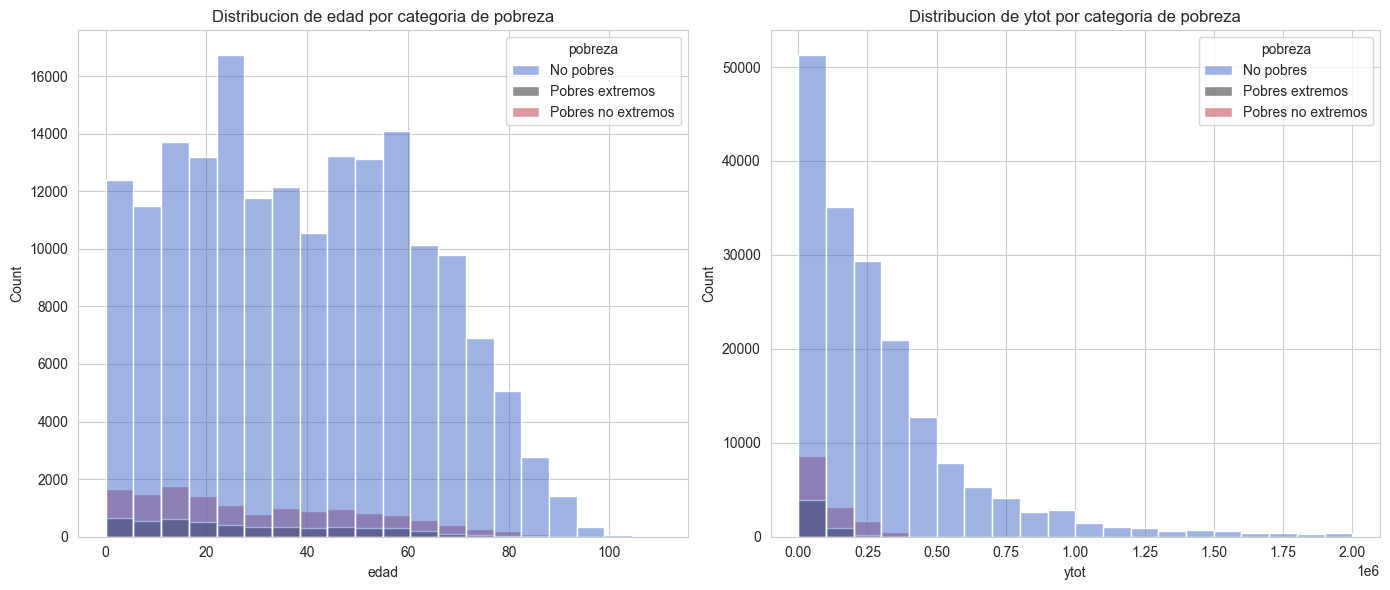

In [53]:
a = df.select_dtypes(exclude="object")

plt.figure(figsize=(14,6),dpi=100)
for i , n in enumerate(a.columns.to_list()):
    plt.subplot(1,2,i+1)
    sns.histplot(data=df,x=n, kde=False, bins=20, hue=df.pobreza, palette="icefire")#, multiple="stack")
    plt.title(f"Distribucion de {n} por categoria de pobreza")
    

plt.tight_layout();

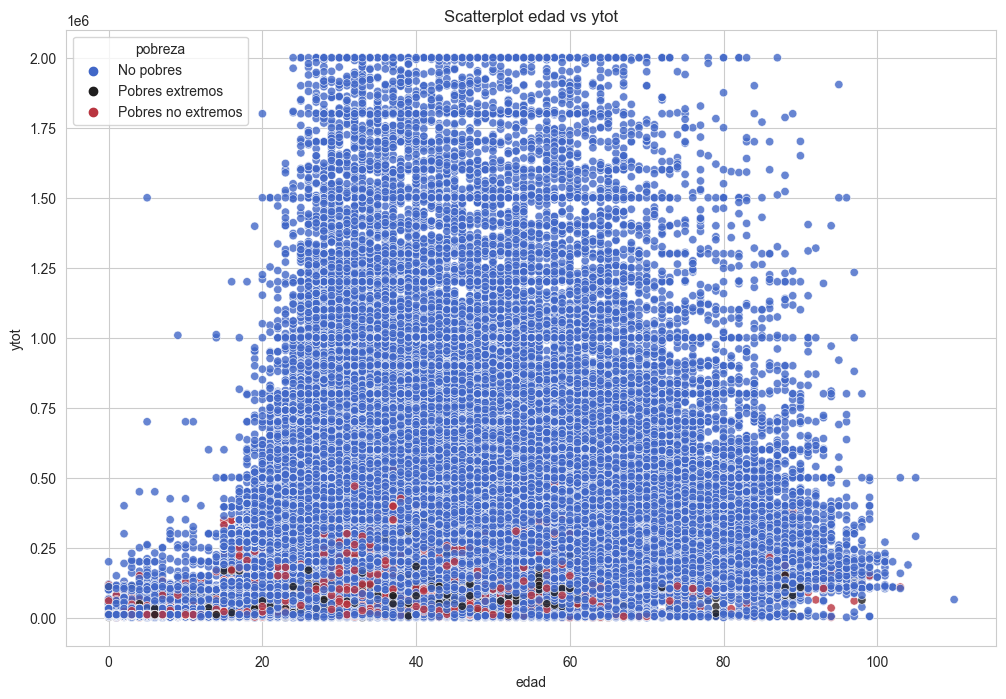

In [54]:
plt.figure(figsize=(12,8),dpi=100)
sns.scatterplot(x=df["edad"],y=df["ytot"],hue=df["pobreza"], alpha=0.8, palette="icefire");
plt.title("Scatterplot edad vs ytot");

Se observa que boxplot detecta algunos outliers. 

Los bigotes exteriores son calculados como (Q1 o Q3) -+ IQR x 1.5 en los dos lados. Fuera de esto, se mostratan outliers si esque existen.

No lidiare con los outliers (valores atipicos) mas alla de lo que hice en la etapa de preprocesamiento. Recordar que estandarizare la data antes de ejecutar algun algoritmo y eso suprimira un poco los efectos de los outliers.

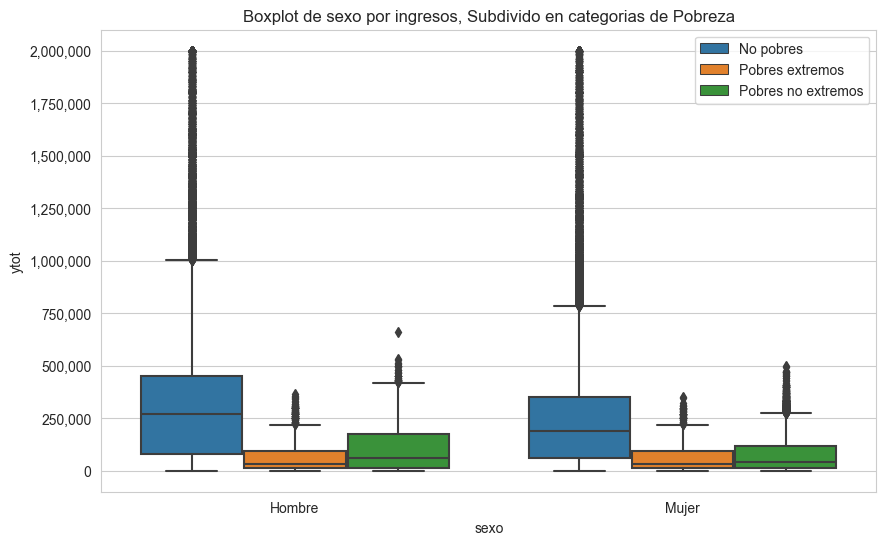

In [55]:
plt.figure(figsize=(10,6),dpi=100)
ax = sns.boxplot(x=df["sexo"], y=df["ytot"], hue=df["pobreza"],)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Boxplot de sexo por ingresos, Subdivido en categorias de Pobreza")
plt.legend(bbox_to_anchor=([1,1,0,0]));

ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

<font color="red"> Considerando el grafico de barras, las tablas y  el pie plot, no se aprecia que exista un sesgo diferenciador significativo en la variable sexo (Mujer o Hombre) para determinar si una persona es pobre o no. diferencias son muy leves porcentualmente.</font>

<font color="red">Recordar tambien que hay mas mujeres que hombres en la data. 53.2% mujeres y 46.8% hombres.</font>

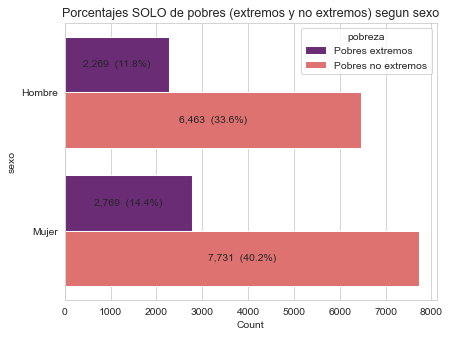

In [56]:
z = df[df["pobreza"]!="No pobres"].groupby(["sexo","pobreza"]).count()["edad"].reset_index()
ax = sns.barplot(x=z.edad, y=z.sexo, orient="h",hue=z["pobreza"], palette="magma", estimator=np.sum)

total = np.sum([np.sum(ax.containers[n].datavalues) for n in range(0,len(ax.containers))])

plt.bar_label(ax.containers[0], labels=[f'{int(x):,}  ({x/total*100:.1f}%)' for x in ax.containers[0].datavalues], label_type="center");
plt.bar_label(ax.containers[1], labels=[f'{int(x):,}  ({x/total*100:.1f}%)' for x in ax.containers[1].datavalues], label_type="center");
plt.xlabel("Count");
plt.title("Porcentajes SOLO de pobres (extremos y no extremos) segun sexo");

Se observa que las siguientes tablas son muy similares porcentualmente lo que me indica que el sexo no es una variable importante para determinar las categorias de la variable pobreza

In [57]:
warnings.filterwarnings("ignore")
q = pd.DataFrame(df.groupby(["sexo"]).count()["edad"] / df.groupby(["sexo"]).count()["edad"].sum())
q.rename(columns={"edad":"porcentaje"},inplace=True)
p = z.groupby("sexo").sum() / z.edad.sum()
p.rename(columns={"edad":"porcentaje"},inplace=True)
warnings.filterwarnings("default")

In [58]:
# Porcentaje segun sexo de personas SOLO en condicion de "pobres no extremos" y "pobres extremos"
np.round(p,3) * 100

porcentaje
sexo              
Hombre        45.4
Mujer         54.6

In [59]:
# Porcentaje segun sexo de personas en condicion de "No pobres", "pobres no extremos","pobres extremos" (todo el dataset)
np.round(q,3) * 100

porcentaje
sexo              
Hombre        46.8
Mujer         53.2

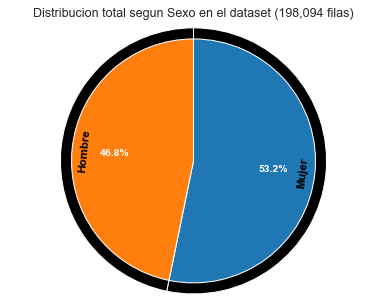

In [60]:
x = df.sexo.value_counts() / df.sexo.count()

fig, ax = plt.subplots()
ax.axis('equal')
pie = ax.pie(x.values, startangle=90, explode=(0, 0), rotatelabels=False, radius=1.2, autopct='%.1f%%',
            colors=["k"],counterclock=False ); # Black circle

_, _, autopcts = pie

pie2 = ax.pie(x.values, radius=1.1,  labeldistance=0.9, labels=x.index,
              rotatelabels =True, startangle=90,counterclock=False, explode=(0,0),textprops={'fontsize': 10})

_, labels = pie2

plt.setp(pie2[1], rotation_mode="anchor", ha="center",va="center")#ha="center"
for n in pie2[1]:
    rot = n.get_rotation()
    n.set_rotation(rot+90+(1-rot//180)*180)

plt.title(f"Distribucion total segun Sexo en el dataset ({df.edad.count():,} filas)")
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':10, "ha":"center"});
plt.setp(labels, **{'color':'black', 'weight':'bold', 'fontsize':11});

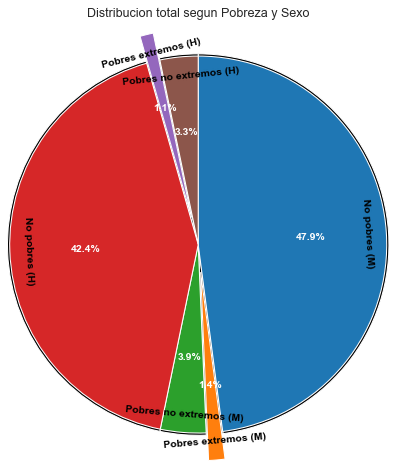

In [61]:
z = df.groupby(["pobreza","sexo"]).count()
z = z.unstack()["edad"].reset_index()
z = z.melt("pobreza",["Mujer","Hombre"],"valor")
z["valor"] = z["valor"].apply(lambda x: "H" if x=="Hombre" else "M")
z["label"] = z["pobreza"] + " " +  "("+z["valor"]+")"
z = z.drop(["pobreza","valor"],axis=1)
x = z.set_index("label")
x = x.value

fig, ax = plt.subplots()
ax.axis('equal')
pie = ax.pie(x.values, startangle=90, explode=(0,0,0,0,0,0), rotatelabels=False, radius=1.72,
            colors=["k"],counterclock=False ); # Black circle


pie2 = ax.pie(x.values, radius=1.7,  labeldistance=0.9, labels=x.index,
              rotatelabels =True, startangle=90,counterclock=False, explode=(0,0.25,0,0,0.25,0),textprops={'fontsize': 10},
             autopct='%.1f%%')

_, labels, autopcts = pie2

plt.setp(pie2[1], rotation_mode="anchor", ha="center",va="center")#ha="center"
for n in pie2[1]:
    rot = n.get_rotation()
    n.set_rotation(rot+90+(1-rot//180)*180)

plt.title("Distribucion total segun Pobreza y Sexo", y=1.3)
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':10, "ha":"center"});
plt.setp(labels, **{'color':'black', 'weight':'bold', 'fontsize':10});

Hay que reconocer que las mujeres ganan menos en promedio, esto se puede deber a un monton de cosas, yo no me compro la hipotesis de la opresion machista patriarcal de la sociedad occidental, aparte si a las mujeres se les pudiera pagar menos (suponiendo que son igual de productivas que los hombres, cosa que creo que es verdad) el desempleo de las mujeres probablemente no existiria.

Yo a priori sostengo que en general las mujeres estudian carreras o desempeñan trabajos menos remunerados o no remunerados y menos riesgosos que los hombres, tambien creo que de tener la posibilidad eligen trabajar menos horas extras ya que son mas orientadas a estar con la familia. Son menos competitivas y ambiciosas en general. Son mas orientadas a las ciencas humanas mientras que los hombres a areas mas duras mejor remuneradas.

Tratare de ver si puedo verificar algunos de estos supuestos que creo apriori.

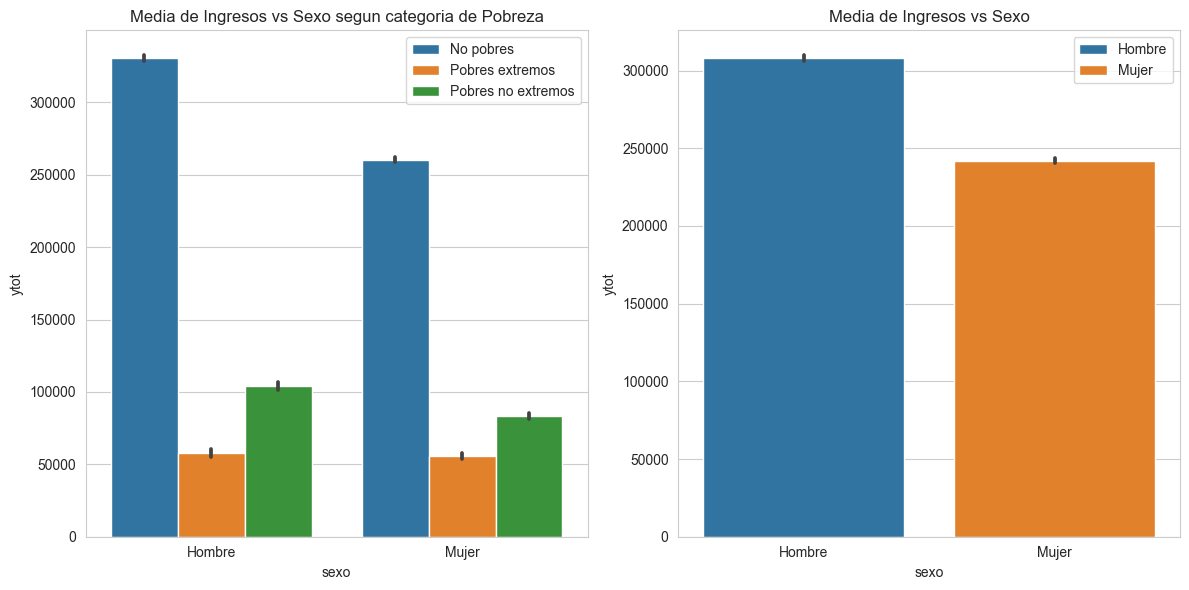

In [62]:
#efectivamente las mujeres ganan menos en promedio que los hombres, salvo cuando estan en condiciones de extrema pobreza.

plt.figure(figsize=(12,6),dpi=100)

plt.subplot(1,2,1)
sns.barplot(x=df["sexo"], y=df["ytot"], estimator=np.mean, hue=df["pobreza"]);
plt.title("Media de Ingresos vs Sexo segun categoria de Pobreza")
plt.legend(bbox_to_anchor=([1,1,0,0]));

plt.subplot(1,2,2)
sns.barplot(x=df["sexo"], y=df["ytot"], estimator=np.mean,label=["Hombre","Mujer"]);
plt.title("Media de Ingresos vs Sexo")
plt.legend(bbox_to_anchor=([1,1,0,0]));

plt.tight_layout()


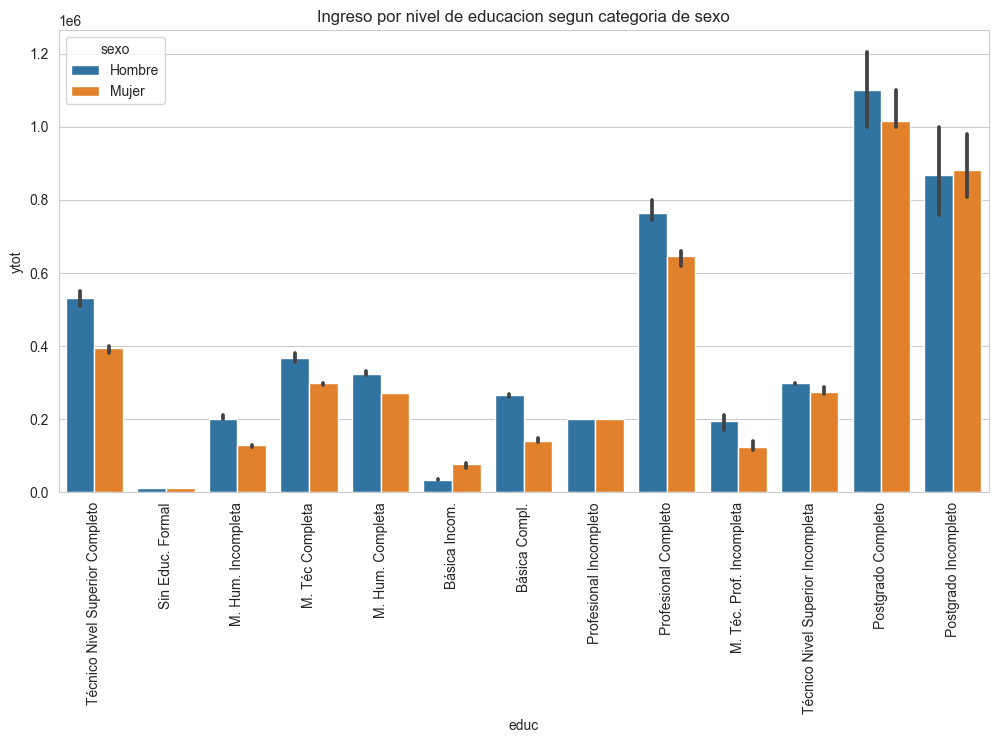

In [63]:
# Esto sigue sin daros informacion mas especifica sobre las carreras en cuestion, siguen siendo categorias muy generales.
# Se sigue confirmando que los hombres ganan mas que las mujeres (en mediana y en promedio). 
# (aqui estoy usando la mediana como estimador en lugar de la media). y sigue sucediendo que los hombres ganamos mas.

plt.figure(figsize=(12,6),dpi=100)
ax = sns.barplot(x=df["educ"], y=df["ytot"], hue=df["sexo"], estimator=np.median, errorbar="ci");
plt.title("Ingreso por nivel de educacion segun categoria de sexo")
plt.xticks(rotation=90);

In [64]:
def countplot_with_percent(xlabel,hue,df,palette="icefire"):
    ax = sns.countplot(x=xlabel, hue=hue, data=df,palette=palette)
    ax.set(ylabel='Count', title=f'Countplot de {xlabel} segun {hue}')

    # add annotations
    for c in ax.containers:

        # custom label calculates percent and add an empty string so 0 value bars don't have a number
        labels = [f'{h/df[hue].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]

        ax.bar_label(c, labels=labels, label_type='edge', **{'color':'black', 'weight':'normal', 'fontsize':10})

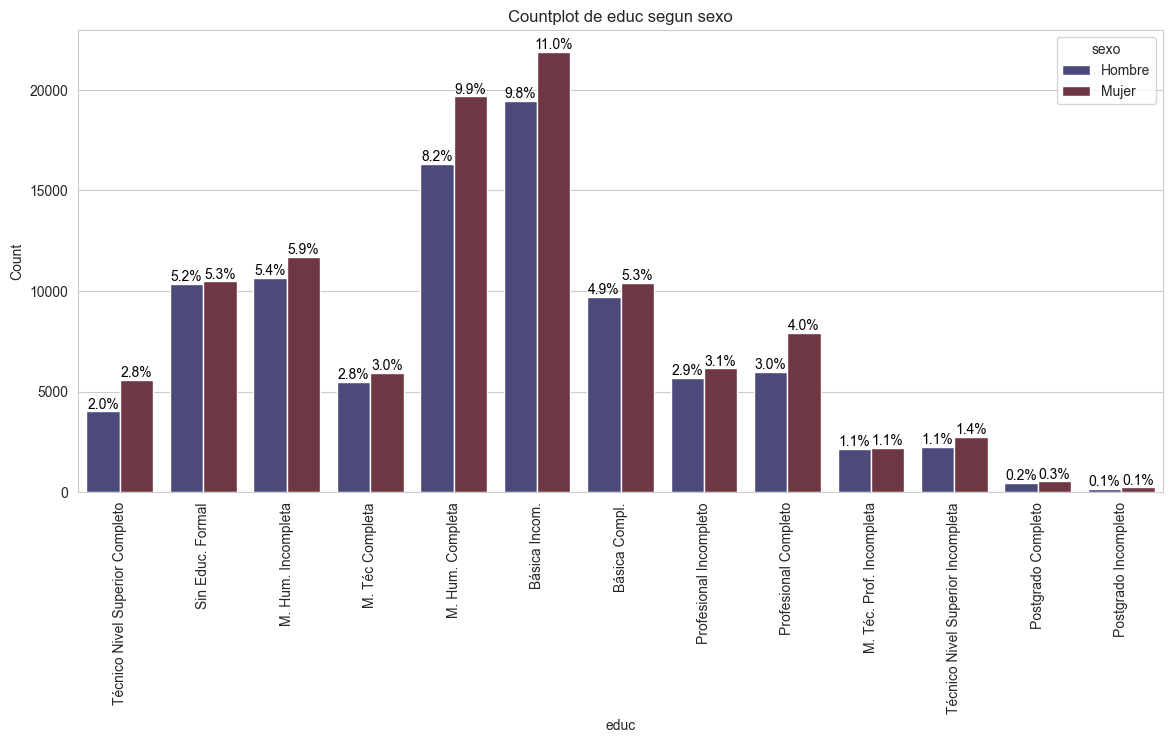

In [65]:
# En total hay mas mujeres en practicamente todos los tipos de educacion, incluso en los niveles mas altos ("ej profesional completo").
# Recordar que igual hay mas mujeres que hombres en el pais.
# Parece que no estan oprimidas, son libres de estudiar y desarrollarse en lo que se les de la gana.

plt.figure(figsize=(14,6),dpi=100)
countplot_with_percent("educ","sexo",df)
plt.xticks(rotation=90);

Hay mayor cantidad de hombres ocupados, mayor cantidad de mujeres inactivas, y una cantidad muy similar de desocupados masculinos y femeninos, nuevamente me pregunto, ¿si a las mujeres les puedo pagar menos y son igual de productivas que los hombres, porque el nivel de desempleo de ambos es muy similar?. Como capitalista deberia tratar de maximizar mi beneficio contratando solo a mujeres ya que les puedo pagar menos. pero eso no se refleja en los porcentajes de desocupacion... hay gato encerrado, ¿sacrifico mi margen de beneficio solo por ser machista opresor?.

Es normal que los hombres tengan ingresos mayores en promedio, hay muchisimos mas hombres ocupados que mujeres, mientras que muchas mujeres se encuentran inactivas (sin embargo igual existe un brecha salarial entre la los sexos considerando solo los "Ocupados"). Pero tambien como señale anteriormente, creo que los hombres en general realizan en mayor cantidad, trabajos mejor remunerados y mas riesgosos que las mujeres. (No puedo comprobar esto con la informacion del dataset), una de las variables que elimine al principio en la limpieza oficio1 (57% de datos faltantes) tambien tenia informacion muy general y no especifica a cada profesion, cargo, experiencia.. etc.

Independientemente de todo esto, hay informacion de fuentes externas a este dataset, de que las mujeres manejan alrededor del 70-80% de las decisiones de compra del mundo.

https://radionotas.com/2022/01/03/mujeres-controlan-el-70-de-las-decisiones-de-compra-llegas-a-ellas-con-tu-emisora/

https://www.semana.com/internacional/articulo/influencias-mujer-decisiones-compra-mundo/208085/

Al parecer los hombres ganan el dinero y las mujeres muchas veces son las que deciden como gastarlo. Preguntar a mi madre y a mi ex. 😆

Me hubiera gustado tener mas data (y tiempo) para analizar esto de la "desigualdad de salarial" y la "opresion contra la mujer". sin embargo voy a ir finalizando el analisis de este punto para no sobreextenderme.

Finalmente Continuo sosteniendo lo que pensaba antes de hacer este pequeño analisis, la mujer en el occidente moderno no se encuentra oprimida ni menospreciada ni empobrecida.

Creo que el feminismo actual es un arma de la izquierda para hacer lo que siempre han hecho a lo largo de la historia (Dividir)...
hombres vs mujeres, pueblos originarios vs mestizos, burgueses vs proletariado, judios vs Arios (si, el nacional socialismo es un movimiento de izquierda)...

In [66]:
# sigue existiendo una brecha en la media de los ingresos por sexo de los Ocupados.
df[df["activ"]=="Ocupados"].groupby("sexo").mean(numeric_only=True)["ytot"]

sexo
Hombre    491648.167318
Mujer     430284.679545
Name: ytot, dtype: float64

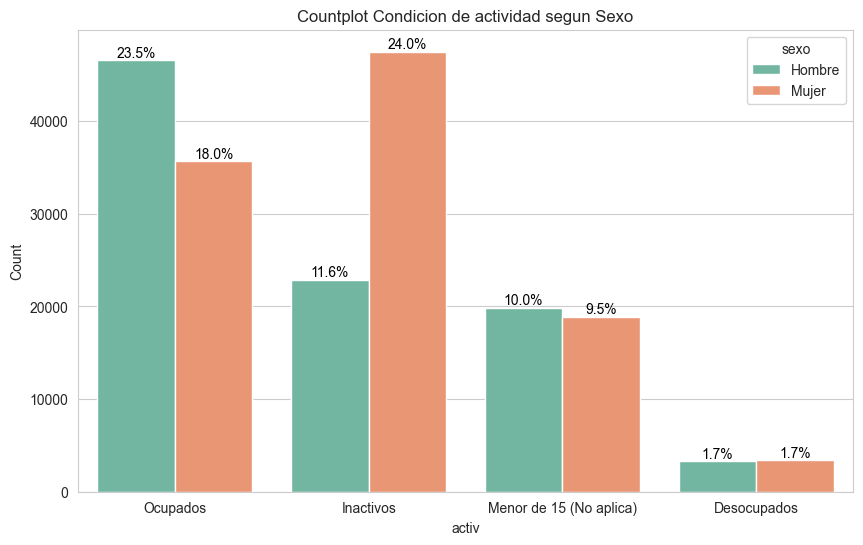

In [67]:
plt.figure(figsize=(10,6),dpi=100)
countplot_with_percent("activ","sexo",df,palette="Set2")
plt.title("Countplot Condicion de actividad segun Sexo");

<font color="blue"> Antes de finalizar el EDA, creare varios Countplots de las variables categoricas, coloreadas y separadas por las categorias de la variable dependiente "pobreza" y eliminare la variable creada "edad_discretizada" al terminar. Hare simplemente una inspeccion visual haber si algo me llama la atencion.</font>

In [68]:
categorical_cols = df.select_dtypes(include="object").columns.to_list()
categorical_cols.remove("pobreza")
first_5 = categorical_cols[:5]
last_4 = categorical_cols[5:]

In [69]:
import random
random.seed(42)

Palettes = ["flare","magma","viridis","icefire","rocket_r","crest","Set2","cubehelix","vlag"]

plt.figure(figsize=(15,50),dpi=300)

for n,value in enumerate(first_5):
    plt.subplot(5,1,n+1)
    plt.xticks(rotation=90)
    countplot_with_percent(value,hue="pobreza", df=df, palette=random.choice(Palettes))

plt.tight_layout()

In [70]:
import random
random.seed(42)
Palettes = ["flare","magma","viridis","icefire","rocket_r","crest","Set2","cubehelix","vlag"]

plt.figure(figsize=(15,40),dpi=300)

for n,value in enumerate(last_4):
    plt.subplot(4,1,n+1)
    plt.xticks(rotation=90)
    countplot_with_percent(value,hue="pobreza", df=df, palette=random.choice(Palettes))

plt.tight_layout()

<font color="red">Finalizare el EDA Con un analisis de correlaciones, Pasare mis variables Categoricas a dummies.</font>

De momento no me preocupa la multicolinearidad, no usare "drop_first=True" en pd.getdummies() por ahora.

Se observa que pobres extremos y no extremos tienen correlaciones muy parecidas, creo que voy a convertir el problema en binario antes de ejecutar algoritmos, creare solo 2 categorias, pobre y no pobre. a lo largo de EDA se ha observado que pobres no extremos y extremos tienen caracteristicas muy similares

In [71]:
df = df.drop("edad_discretizada",axis=1)

In [72]:
df1 = df.copy()

In [73]:
df1 = pd.get_dummies(df1) # De momento no usare "drop_first=True"

In [74]:
pd.set_option("display.max_columns", None)

In [75]:
df1.head(2)

edad      ytot  sexo_Hombre  sexo_Mujer  ecivil_Anulado(a)  \
4    26  341667.0            1           0                  0   
5    26  300000.0            0           1                  0   

   ecivil_Casado(a)  ecivil_Conviviente civil (con acuerdo de unión civil)  \
4                 1                                                  0       
5                 1                                                  0       

   ecivil_Conviviente o pareja sin acuerdo de unión civil  \
4                                                  0        
5                                                  0        

   ecivil_Divorciado (a)  ecivil_Separado(a)  ecivil_Soltero(a)  \
4                      0                   0                  0   
5                      0                   0                  0   

   ecivil_Viudo(a)  s12_FF.AA. y de Orden  s12_ISAPRE  \
4                0                      0           0   
5                0                      0           0   

   s12_Sistema Público FONASA Grupo A  s12_Sistema Público FONASA Grupo B  \
4                                   0                                   1   
5                                   0                                   1   

   s12_Sistema Público FONASA Grupo C  s12_Sistema Público FONASA Grupo D  \
4                                   0                                   0   
5                                   0                                   0   

   s12_Sistema Público FONASA No sabe grupo  pobreza_No pobres  \
4                                         0                  1   
5                                         0                  1   

   pobreza_Pobres extremos  pobreza_Pobres no extremos  educ_Básica Compl.  \
4                        0                           0                   0   
5                        0                           0                   0   

   educ_Básica Incom.  educ_M. Hum. Completa  educ_M. Hum. Incompleta  \
4                   0                      0                        0   
5                   0                      0                        0   

   educ_M. Téc Completa  educ_M. Téc. Prof. Incompleta  \
4                     0                              0   
5                     0                              0   

   educ_Postgrado Completo  educ_Postgrado Incompleto  \
4                        0                          0   
5                        0                          0   

   educ_Profesional Completo  educ_Profesional Incompleto  \
4                          0                            0   
5                          0                            0   

   educ_Sin Educ. Formal  educ_Técnico Nivel Superior Completo  \
4                      0                                     1   
5                      0                                     1   

   educ_Técnico Nivel Superior Incompleta  activ_Desocupados  activ_Inactivos  \
4                                       0                  0                0   
5                                       0                  0                1   

   activ_Menor de 15 (No aplica)  activ_Ocupados  indsan_Aceptable  \
4                              0               1                 0   
5                              0               0                 0   

   indsan_Deficitario  calglobviv_Aceptable  calglobviv_Irrecuperable  \
4                   1                     0                         0   
5                   1                     0                         0   

   calglobviv_Recuperable  hacinamiento_Hacinamiento crítico (5 y más)  \
4                       1                                            0   
5                       1                                            0   

   hacinamiento_Hacinamiento medio alto (3,5 a 4,9)  \
4                                                 0   
5                                                 0   

   hacinamiento_Hacinamiento medio bajo (2,5 a 3,49)  \
4                                             

In [76]:
corr_no_pobres = df1.drop(["pobreza_Pobres extremos","pobreza_Pobres no extremos"],axis=1).corr()["pobreza_No pobres"].sort_values()[:-1]

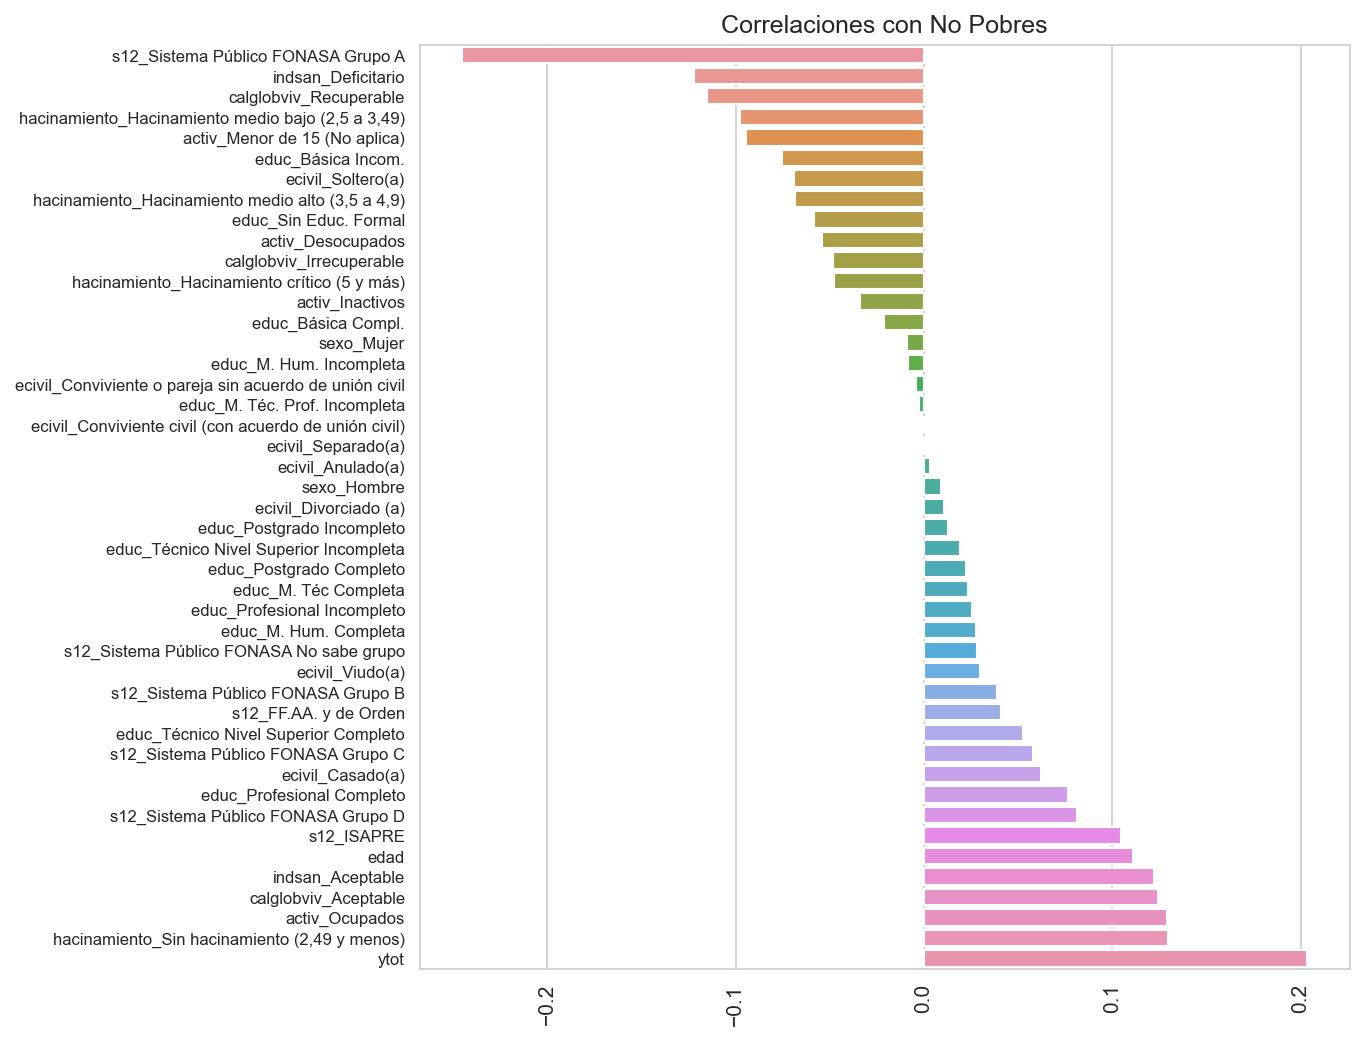

In [77]:
plt.figure(figsize=(8, 8), dpi=150)
sns.barplot(x=corr_no_pobres.values, y=corr_no_pobres.index, orient="h")
plt.title(label="Correlaciones con No Pobres")
plt.yticks(size=8)
plt.xticks(rotation=90);

In [78]:
corr_pobres_extremos = df1.drop(["pobreza_Pobres no extremos","pobreza_No pobres"],axis=1
                                  ).corr()["pobreza_Pobres extremos"].sort_values()[:-1]

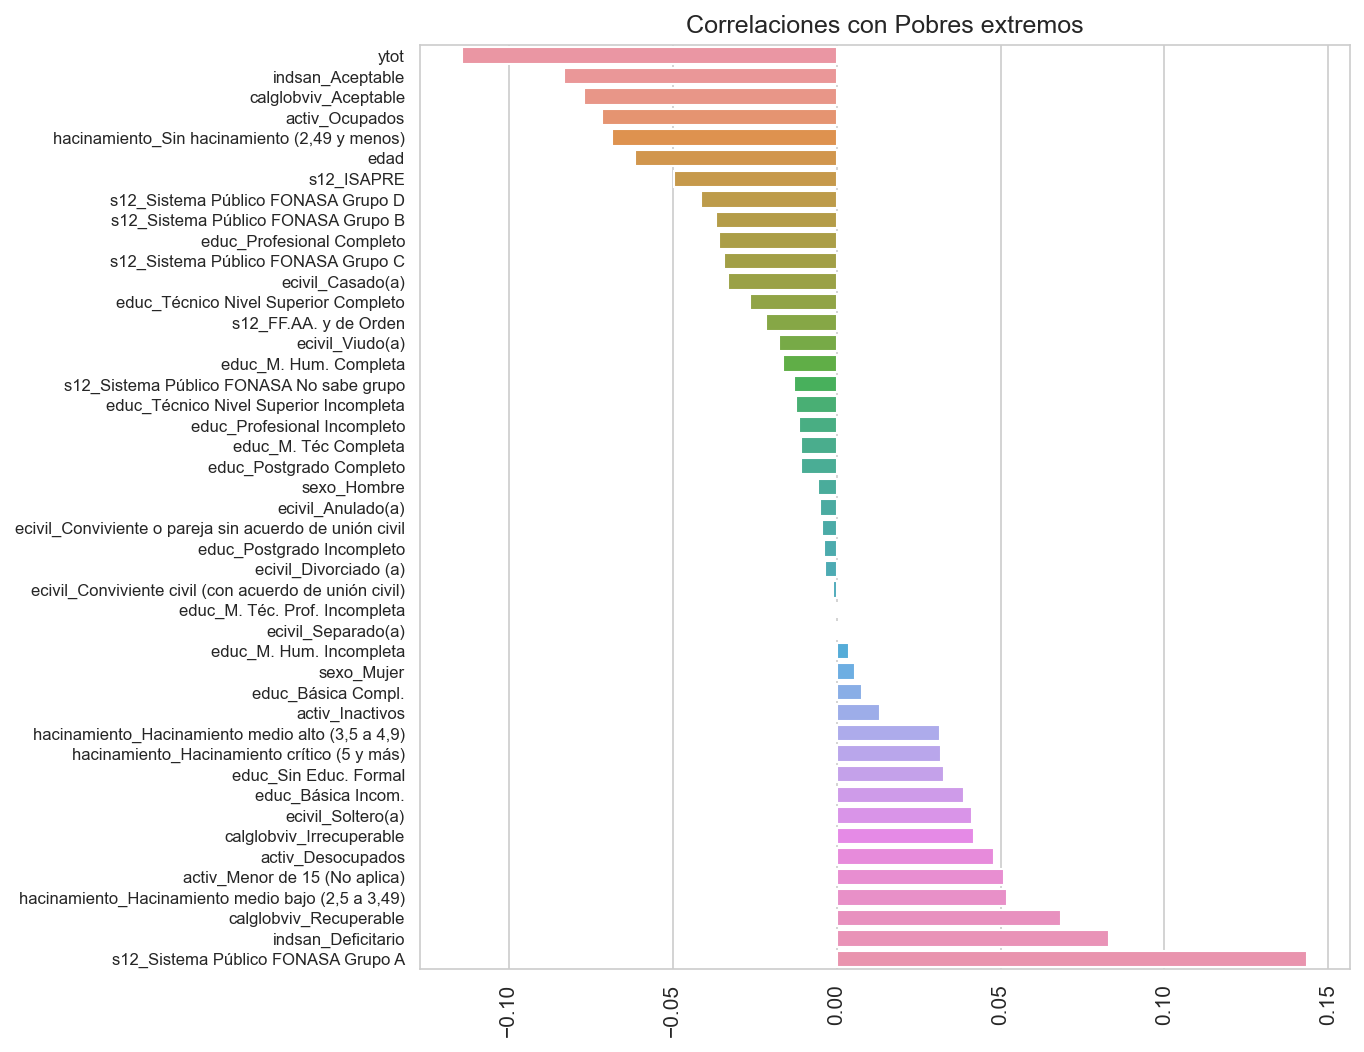

In [79]:
plt.figure(figsize=(8, 8), dpi=150)
sns.barplot(x=corr_pobres_extremos.values, y=corr_pobres_extremos.index, orient="h")
plt.title(label="Correlaciones con Pobres extremos")
plt.yticks(size=8)
plt.xticks(rotation=90);

In [80]:
corr_pobres_no_extremos = df1.drop(["pobreza_Pobres extremos","pobreza_No pobres"],axis=1
                                  ).corr()["pobreza_Pobres no extremos"].sort_values()[:-1]

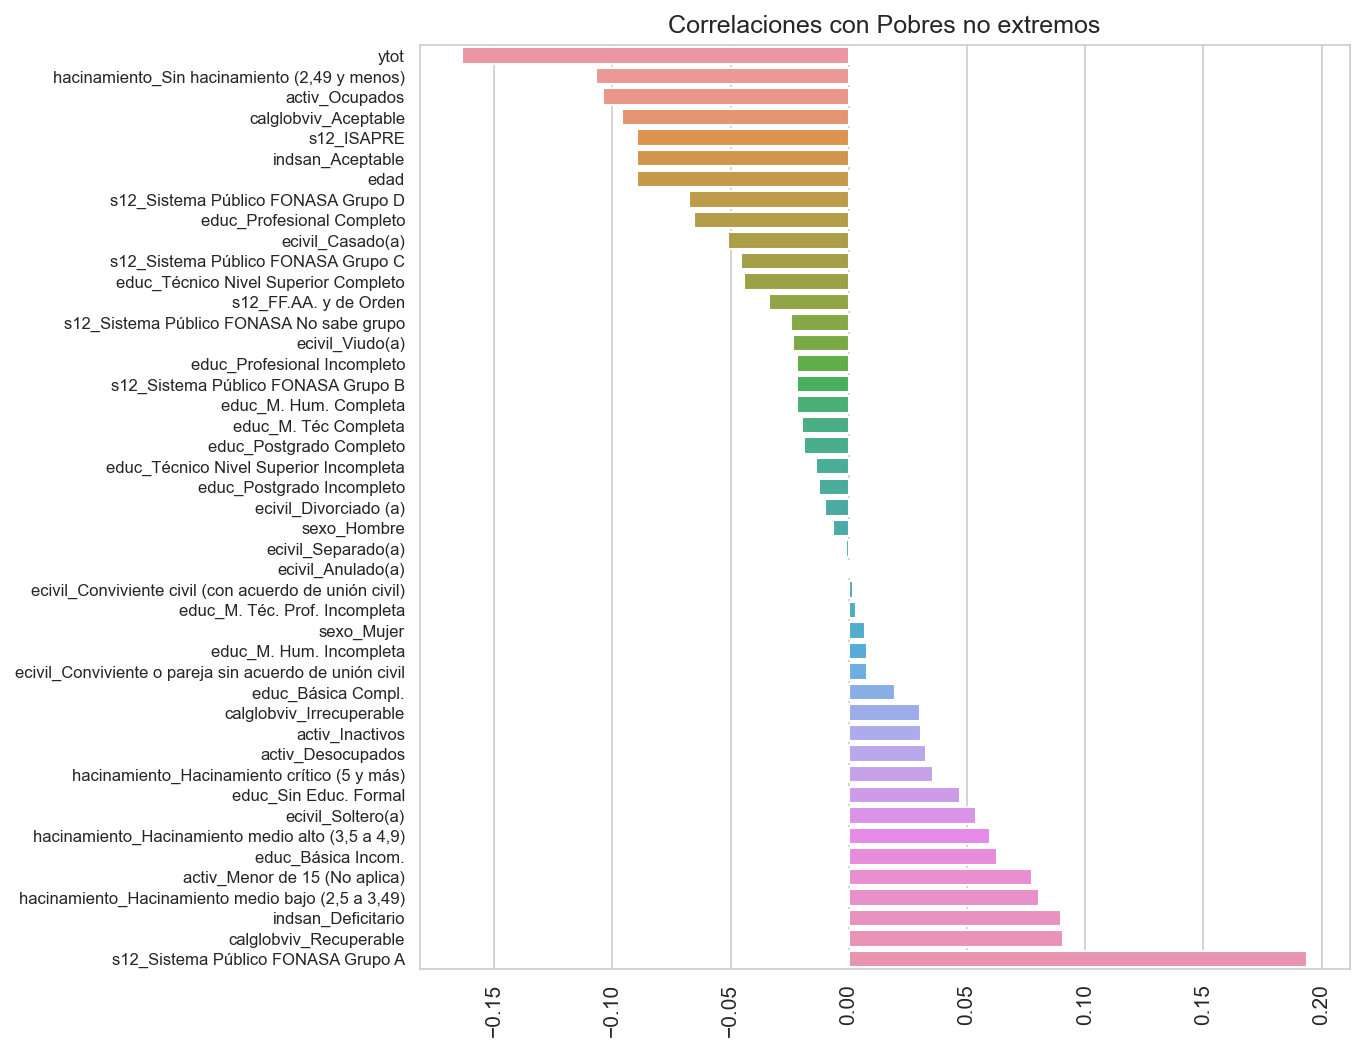

In [81]:
plt.figure(figsize=(8, 8), dpi=150)
sns.barplot(x=corr_pobres_no_extremos.values, y=corr_pobres_no_extremos.index, orient="h")
plt.title(label="Correlaciones con Pobres no extremos")
plt.yticks(size=8)
plt.xticks(rotation=90);

# Modelos

A partir del EDA, sobre todo en la parte final de analisis de correlacion, no se observan correlaciones lineales significativas, practicamente ninguna pasa de los +-0.25 para todas las variables explicativas, nos enfrentamos a una problematica no lineal.
Descartare de antemano la regresion logistica.

Tambien creo que descartare tanto a naive bayes y a KNN, tengo experiencia previa utilizando estos algoritmos y Naive bayes generalmente da mala performance (con la excepcion de problemas de NLP), aparte creo que varias variables dependientes en el dataset no son independientes las unas de las otras, KNN generalmente no da buenas metricas de desempeño. (quizas utilize Naive Bayes como baseline)

Descartare tambien Support Vector Machine ya que generalmente se demora mucho en correr, sobre todo con cross-validation y gridsearch.

Creo que mi mejor forma de proceder es utilizar algoritmos de arboles de decision, ensembles y/o boosting.

Tambien podria intentar redes neuronales ya que tengo gran cantidad de data.



<font color="red"> Mi plan de Trabajo sera el siguiente</font>:

- Tratar el problema de desbalanceo de clases. en vez de utilizar imblearn y utilizar las tecnicas para solucionar el desbalanceo vistas en clases (Smote, downsampling, upsampling), hare algo distinto utilizando https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html
Ya he tenido experiencia con esto y los resultados generalmente son parecidos (pero no exactos).. (podria intentar todos los metodos para solucionar el desbalanceo pero me extenderia mucho, ocupare solo el metodo de modificar los class weights).

- No realizare un problema multiclase, transformare esto en un problema binario, redefinire mi variable dependiente en 2, Pobres y No pobres.

- Experimento 0: Creare un experimiento base utilizando Naive Bayes probare con Gaussian/Multinomial/Bernoulli. (con cross-validation y gridsearch)
- Experimento 1: Utilizare Random Forest (o LightGBM/XGBoost ya que los puedo correr con la GPU), con cross-validation y con busqueda de hyperparametros optimos.
- Experimento 2: Red Neuronal. (La puedo Correr con la GPU)

In [82]:
def redo_pobreza(pobreza):
    if pobreza == "No pobres":
        return "No pobre"
    elif pobreza == "Pobres no extremos" or pobreza=="Pobres extremos":
        return "Pobre"
    
df["pobreza"] = df["pobreza"].apply(redo_pobreza)

In [83]:
df["pobreza"].value_counts()

No pobre    178862
Pobre        19232
Name: pobreza, dtype: int64

### Experimento 0, Gaussian/Multinomial/Bernoulli Naive Bayes.

Naive bayes presentaria problemas si existe multicolinearidad por su supuesto de independencia de los predictores, por lo que utilizare pd.getdummies(drop_first=True) para evitar multicolinearidad. (para redes neuronales y arboles de decisiones no necesito hacer drop_first=True).

Podria tambien haber intentado hacer un Mix, usando categoricalNB para las variables categoricas y Gauss/bernoulliNB para las continuas como señala el siguiente articulo. Pero seria sobre complicar las cosas.<br>
https://towardsdatascience.com/naive-bayes-classifier-how-to-successfully-use-it-in-python-ecf76a995069

In [84]:
X = pd.get_dummies(df.drop("pobreza",axis=1),drop_first=True)
y = df.pobreza

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [86]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [87]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(2, array(['No pobre', 'Pobre'], dtype=object))

In [88]:
encoded_unique = np.unique(y_train)

In [89]:
label_encoder.inverse_transform(np.unique(y_train))

array(['No pobre', 'Pobre'], dtype=object)

In [90]:
from sklearn.utils.class_weight import compute_sample_weight, compute_class_weight

s_weights = compute_sample_weight(class_weight='balanced', y=y_train)
c_weights = compute_class_weight(class_weight='balanced', y=y_train, classes=encoded_unique)
s_weights, c_weights

(array([0.55376374, 5.149974  , 0.55376374, ..., 0.55376374, 0.55376374,
        0.55376374]),
 array([0.55376374, 5.149974  ]))

In [91]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV

In [92]:
scaler = StandardScaler()

nb = GaussianNB()

operations = [("scaler", scaler), ("nb", nb)]

pipe = Pipeline(operations)

param_grid ={'nb__var_smoothing': [1e-9, 1e-8, 1e-7]}

model_0_gauss = GridSearchCV(
    pipe, param_grid, cv=5, scoring="f1_macro", n_jobs=-1)
model_0_gauss.fit(X_train,y_train, **{'nb__sample_weight':s_weights})

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('nb', GaussianNB())]),
             n_jobs=-1, param_grid={'nb__var_smoothing': [1e-09, 1e-08, 1e-07]},
             scoring='f1_macro')

In [93]:
scaler = MinMaxScaler()

nb = MultinomialNB()

operations = [("scaler", scaler), ("nb", nb)]

pipe = Pipeline(operations)

param_grid ={'nb__alpha': [0.1, 0.5, 1, 5]}

model_0_multi = GridSearchCV(
    pipe, param_grid, cv=5, scoring="f1_macro", n_jobs=-1)
model_0_multi.fit(X_train,y_train, **{'nb__sample_weight':s_weights})

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1, param_grid={'nb__alpha': [0.1, 0.5, 1, 5]},
             scoring='f1_macro')

In [94]:
scaler = StandardScaler()

nb = BernoulliNB()

operations = [("scaler", scaler), ("nb", nb)]

pipe = Pipeline(operations)

param_grid ={'nb__alpha': [0.1, 0.5, 1, 5]}

model_0_bernoulli = GridSearchCV(
    pipe, param_grid, cv=5, scoring="f1_macro", n_jobs=-1)
model_0_bernoulli.fit(X_train,y_train, **{'nb__sample_weight':s_weights})

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('nb', BernoulliNB())]),
             n_jobs=-1, param_grid={'nb__alpha': [0.1, 0.5, 1, 5]},
             scoring='f1_macro')

In [95]:
from sklearn.metrics import (matthews_corrcoef, roc_auc_score, recall_score, accuracy_score,
                             f1_score, ConfusionMatrixDisplay, classification_report, precision_score,
                             average_precision_score)

def models_tracker_df():

    class_models_scores = pd.DataFrame(
    columns=["model_name", "mathews", "roc_auc", "f1_score", "accuracy", "recall", "precision"])

    return class_models_scores


def bin_class_report_model(predictions,preds_probs, y_test, class_names, tracker_df="none", model_name="model_name"):

    if isinstance(preds_probs, pd.core.frame.DataFrame):
        preds_probs = preds_probs.values

    matthews = round(matthews_corrcoef(y_test, predictions), 3)
    roc_auc = round(roc_auc_score(y_test, preds_probs[:,1]), 3)
    f1_scor = round(f1_score(y_test, predictions,average="weighted"), 3)
    accur = round(accuracy_score(y_test, predictions), 3)
    precision = round(precision_score(y_test, predictions, average="weighted"), 3)
    recall = round(recall_score(y_test, predictions, average="weighted"), 3)
    av_prec_score = round(average_precision_score(y_test, preds_probs[:,1]),3)

    print("Mathews Corr Coef: ", matthews)
    print("ROC AUC Score: ", roc_auc)
    print("Average Precision Score:", av_prec_score)
    print("\n")
    print(classification_report(y_test, predictions, target_names=class_names))

    fig, ax = plt.subplots(figsize=(3, 3), dpi=100)
    ConfusionMatrixDisplay.from_predictions(
        y_test, predictions, cmap="viridis", ax=ax ,display_labels=class_names)

    if isinstance(tracker_df, pd.core.frame.DataFrame):
        tracker_df.loc[tracker_df.shape[0]] = [
            model_name, matthews, roc_auc, f1_scor, accur, recall, precision]
    else:
        pass
    
def predictions_probs(model, val_ds, multiclass=False):

        if multiclass:
            preds_prob = model.predict_proba(val_ds)
            preds = preds_prob.argmax(axis=1)
            
            return preds, preds_prob
        else:
            pred_probs = pd.DataFrame(model.predict_proba(val_ds))
            preds = pred_probs[1].apply(lambda x: 1 if x > 0.5 else 0)
            preds = preds.values
            
            return preds, pred_probs

In [96]:
model_0_preds_gauss, model_0_preds_prob_gauss = predictions_probs(model_0_gauss, X_test, multiclass=False)

In [97]:
model_0_preds_multi, model_0_preds_prob_multi = predictions_probs(model_0_multi, X_test, multiclass=False)

In [98]:
model_0_preds_bernu, model_0_preds_prob_bernu = predictions_probs(model_0_bernoulli, X_test, multiclass=False)

In [99]:
tracker = models_tracker_df()

Observamos que MultinomialNB y BernoulliNB dan resultados similares en terminos de f1_macro, que es la metrica de desempeño que seleccionamos que buscamos maximizar. Al Gaussian NB le fue mucho peor, creo que esto es debido a que tenemos muchas variables categoricas y una de las variables (ytot) no tiene una distribucion Gaussiana (normal). podria haber intentado hacer una transformacion logaritmica para normalizarla... pero seria nuevamente sobre complicar las cosas, creo que el siguiente modelo (experimento 1)de arboles de decisiones dara mucho mejor resultado.

Seleccione f1_macro como mi metrica principal ya que es insensible al desbalanceo de classes.

Podria tambien haber ocupado otra metrica como el coeficiente de correlacion de Mathews, PR AUC o ROC AUC.

MCC (mathews) takes into account all four values in the confusion matrix, and a high value (close to 1) means that both classes are predicted well , even if one class is disproportionately under- (or over-) represented
https://towardsdatascience.com/the-best-classification-metric-youve-never-heard-of-the-matthews-correlation-coefficient-3bf50a2f3e9a

Mathews Corr Coef:  0.233
ROC AUC Score:  0.775
Average Precision Score: 0.239


              precision    recall  f1-score   support

    No pobre       0.97      0.53      0.68     35773
       Pobre       0.16      0.87      0.28      3846

    accuracy                           0.56     39619
   macro avg       0.57      0.70      0.48     39619
weighted avg       0.90      0.56      0.64     39619



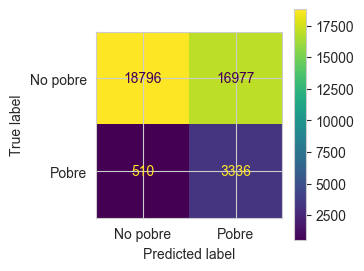

In [101]:
bin_class_report_model(model_0_preds_gauss, model_0_preds_prob_gauss, y_test, class_names, tracker, model_name="Model_0_gauss")

Mathews Corr Coef:  0.246
ROC AUC Score:  0.768
Average Precision Score: 0.26


              precision    recall  f1-score   support

    No pobre       0.96      0.68      0.80     35773
       Pobre       0.19      0.72      0.31      3846

    accuracy                           0.69     39619
   macro avg       0.58      0.70      0.55     39619
weighted avg       0.88      0.69      0.75     39619



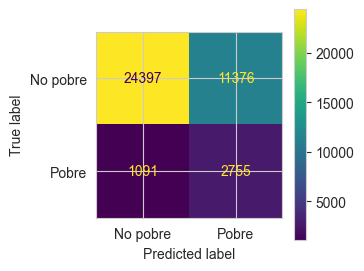

In [102]:
bin_class_report_model(model_0_preds_multi, model_0_preds_prob_multi,  y_test, class_names, tracker, model_name="Model_0_multinomial")

Mathews Corr Coef:  0.244
ROC AUC Score:  0.778
Average Precision Score: 0.261


              precision    recall  f1-score   support

    No pobre       0.96      0.66      0.78     35773
       Pobre       0.19      0.74      0.30      3846

    accuracy                           0.67     39619
   macro avg       0.57      0.70      0.54     39619
weighted avg       0.88      0.67      0.73     39619



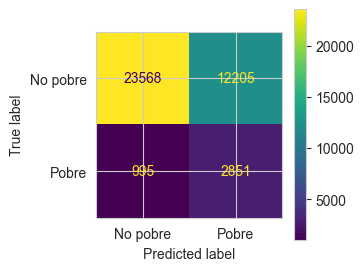

In [103]:
bin_class_report_model(model_0_preds_bernu, model_0_preds_prob_bernu, y_test, class_names, tracker, model_name="Model_0_bernoulli")

### Experimento 1: LightGBM

Modelos basados en arboles de decisiones son robustos frente a la multicolinearidad y no es necesario standarizar o escalar la data.

LightGBM en particular es capaz de manejar columnas categoricas, por lo que no es necesario ocupar pd.getdummies().

In [ ]:
X = df.drop("pobreza",axis=1)
y = df.pobreza

In [ ]:
# Extract categoricals and their indices
cat_features = X.select_dtypes(exclude=np.number).columns.to_list()
cat_idx = [X.columns.get_loc(col) for col in cat_features]

# Convert cat_features to pd.Categorical dtype
for col in cat_features:
    X[col] = pd.Categorical(X[col])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
from lightgbm import LGBMClassifier
import optuna
from sklearn.metrics import  f1_score

In [ ]:
params = LGBMClassifier().get_params()
print(params)

In [ ]:
from optuna.integration import LightGBMPruningCallback
from sklearn.model_selection import StratifiedKFold

def objective(trial, X, y):
    param_grid = {
        "verbosity": -1,
        "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_categorical("n_estimators", [7500,10000,12500]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_child_samples": trial.suggest_int("min_data_in_leaf", 200, 10000, step=100),
        "reg_alpha": trial.suggest_loguniform("lambda_l1", 0.0001, 100),
        "reg_lambda": trial.suggest_loguniform("lambda_l2", 0.0001, 100),
        "min_split_gain": trial.suggest_float("min_gain_to_split", 0, 15),
        "subsample": trial.suggest_float("subsample", 0.3, 1, step=0.1),
        "subsample_freq": trial.suggest_categorical("subsample_freq", [0,1]), 
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 1, step=0.1),
    }

    
    def f1_macro(y_val, y_pred):
        is_higher_better = True
        name = "f1_macro"
        y_pred = (y_pred>0.5)*1
        value = f1_score(y_val, y_pred,average="macro")
        return name, value, is_higher_better
    
    
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_val = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_val = y[train_idx], y[test_idx]

        model = LGBMClassifier(objective="binary", class_weight="balanced",random_state=123, silent=True,**param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_val, y_val)],
            eval_metric=f1_macro,
            early_stopping_rounds=100,
            categorical_feature=cat_idx, #specifiy categorial features.
            callbacks=[LightGBMPruningCallback(trial, "f1_macro")],  # Add a pruning callback
            verbose=0)
        preds =  model.predict(X_val)
        cv_scores[idx] = f1_score(y_val, preds,average="macro")
        

    return np.mean(cv_scores)

In [ ]:
model1 = LGBMClassifier(objective="binary", class_weight="balanced",random_state=123, silent=True)
model1.fit()

In [ ]:
# ###### warnings.filterwarnings("ignore")
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
#study.enqueue_trial(try_this_first)
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=200)#callbacks=[best_model_callback])

In [ ]:
params = study.best_params

In [ ]:
params

In [ ]:
model1 = LGBMClassifier(**params)

In [ ]:
model1.fit(X_train,y_train)

In [ ]:
model_1_preds  = model1.predict(X_test)

In [ ]:
model_1_preds_probs = model1.predict_proba(X_test)


Se observa como el modelo 1 (LightGBM) sobrepasa practicamente en todas las metricas, la performance lograda por nuestro experimento 0 (Multinomial/gaussian/bernoulli Naive Bayes).

In [ ]:
bin_class_report_model(model_1_preds, model_1_preds_probs, y_test, class_names, tracker, model_name="Model_1")

### Experimento 2: Deep Neural Network

Las redes neuronales profundas, son robustas frente a problemas de multicoliniaridad.

Sin embargo es necesario escalar la data.

Aqui (si fuera muy riguroso) deberia haber usado 3 sets, training, validation y test. Ya que no estoy haciendo cross-validation en la deep neural network. Pero para ocupar un train/test split similar a experimentos anteriores, ocupare 2 sets, training-val(80%)/test(20%).

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow_addons as tfa

In [ ]:
X = pd.get_dummies(df.drop("pobreza",axis=1),drop_first=False)
y = df.pobreza

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

In [ ]:
tf_class_weights = dict(zip(label_encoder.transform(class_names),c_weights))
tf_class_weights

In [ ]:
tf.keras.mixed_precision.set_global_policy("mixed_float16")

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False) # we can use a non Sparse-Matrix
y_train_encoded = one_hot_encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = one_hot_encoder.transform(y_test.reshape(-1, 1))


In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train_encoded))
train_ds = train_ds.shuffle(1000).batch(256)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test_encoded))
test_ds = test_ds.batch(256)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
X_train.shape

In [ ]:
f1_macro = tfa.metrics.F1Score(2,average="macro",name="f1_macro")

Ocupo "loss" en lugar de "val_loss" ya que podria implicar dataleakege en los callbacks.

In [ ]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor="loss",restore_best_weights=True,patience=40,)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("weights_checkpoints/cp",monitor="loss",save_weights_only=True,  verbose=1, save_best_only=True)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(49,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1,seed=42),
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.1,seed=42),
    tf.keras.layers.Dense(64, activation='relu'),
    #tf.keras.layers.Dropout(0.1,seed=42),
    #tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax', dtype="float32")])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              metrics=[f1_macro])

In [ ]:
# history = model.fit(train_ds, epochs=400, steps_per_epoch=len(train_ds), validation_data=test_ds, validation_steps=len(test_ds),
#                     verbose=1, callbacks=[earlystopping,model_checkpoint], class_weight=tf_class_weights)

In [ ]:
model.load_weights("weights_checkpoints/cp")

In [ ]:
def predictions_probs_ytest(model, val_ds, y_test=False, multiclass=False, tensorflow=True):
    """ Returns a tuple of (preds , preds_probs),
    If y_test=True it will return a tuple of (preds, pred_probs, y_test), val_ds must be a TF dataset for no errors.

    model (Tensorflow model)
    val_ds (X_test or Tensorflow val_ds)
    y_test (Boolean)
    multiclass (Boolean)
    
    """
    if tensorflow:
        if y_test:
            y_testt = []
            for x, y in val_ds:

                y_testt.append(y)

            y_testt = np.concatenate(y_testt, axis=0)
        else:
            pass


        if multiclass:
            preds_prob = model.predict(val_ds)
            preds = preds_prob.argmax(axis=1)
        else:
            preds_prob = model.predict(val_ds).reshape(-1)
            preds = (preds_prob >0.5)*1

        if y_test:
            return preds, preds_prob, y_testt
        else:
            return preds, preds_prob
        
    else:
        if multiclass:
            preds_prob = model.predict_proba(val_ds)
            preds = preds_prob.argmax(axis=1)
        else:
            preds_prob = model.predict_proba(val_ds)
            preds = (preds_prob >0.5)*1
            
        return preds, preds_prob

Lo trate como un problema multiclase porque ocupe categorical_crossentropy y la funcion de activacion softmax, pero tecnicamente es un problema binario, no multiclase.

In [ ]:
model_2_pred, model_2_pred_probs, y_test_encoded = predictions_probs_ytest(model,test_ds,y_test=True,multiclass=True)

In [ ]:
y_test = one_hot_encoder.inverse_transform(y_test_encoded).reshape(-1)

In [ ]:
bin_class_report_model(model_2_pred, model_2_pred_probs, y_test, class_names, tracker, model_name="Model_2")

# Conclusion

Se observa que con diferencia, Mi experimento 1 (LightGBM), supera con creces al baseline experimento (0), (Multinomial/Gaussian Naive Bayes) y por un poco menos al experimento 2 (Deep Neural Network).

Quizas podria obtener un modelo aun mejor utilizando mas variables de la casen_2017, que no fueron incluidas en el dataset facilitado por la profesora. Se observa que los modelos en general son capaces de detectar una gran cantidad de casos de pobreza, pero tienen bastante Falsos positivos por lo que la metrica de precision para la clase "pobre" es un poco baja en todos los modelos.

Se observa que el modelo que mejor performance tuvo (LightGBM) tiene como variables mas "importantes" o con mayor poder predictivo:

1. ytot (Ingreso total)
2. Edad
3. Educ (Nivel de Educacion)
4. Sistema de Salud Previsional
5. Estado Civil

Si quisiera crear un modelo mas simple para esta problematica de solo 5 variables por ejemplo, tendria en cuenta a estas 5.

In [ ]:
import lightgbm

In [ ]:
#If "split", result contains numbers of times the feature is used in a model.
lightgbm.plot_importance(model1|, max_num_features = 10, height=.9, importance_type="split");

In [ ]:
#If "gain", result contains total gains of splits which use the feature.
lightgbm.plot_importance(model1, max_num_features = 10, height=.9, importance_type="gain", precision=0);